In [ ]:
!wget https://www.dropbox.com/s/x312nb626azt9ot/flowers-recognition.zip?dl=0 -O flowers.zip
!unzip flowers.zip

In [105]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import torch.nn.functional as F
from torch.autograd import Variable

#Visualization + tools
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from mpl_toolkits.axes_grid1 import AxesGrid

In [106]:
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

image_dataset = torchvision.datasets.ImageFolder('flowers/',transform=data_transform)
dataloader =torch.utils.data.DataLoader(image_dataset, batch_size=10, shuffle=True, num_workers=1)
class_names = image_dataset.classes

inputs, classes = next(iter(dataloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'flowers/'

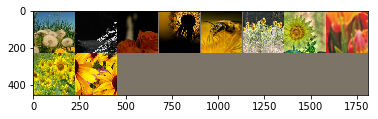

In [103]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
imshow(out)

Мы берем глубокую нейронную сеть AlexNet и смотрим на ее ахритектуру. Нам надо добавить новый слой который будет классифицировать цветы за место старого, который классифицировал ImageNet. 

1. Когда мы будем обучать сеть - нам 

In [81]:
alexnet = torchvision.models.alexnet(pretrained=True)
for param in alexnet.parameters():
    param.requires_grad = False
    
#количество признаков на последнем слое
feature_number = alexnet.classifier[6].in_features
#Тот слой, который мы будем обучать
finetune_layer = nn.Linear(feature_number, 5)

#TODO Удалить последний слой классификатора, поставить вместо него finetune_layer

In [100]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(finetune_layer.parameters(), lr=0.001)

for i in range(100):
    inputs, labels = next(iter(dataloader))
    optimizer.zero_grad()
    outputs = alexnet(Variable(inputs))
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, Variable(labels,requires_grad=False))
    loss.backward()
    optimizer.step()
    if 0==i%10:
        print(loss.data[0], torch.sum(labels==preds.data))

0.6241887211799622 3
1.7262979745864868 3
0.5769386291503906 2
0.11977344006299973 4
1.4739174842834473 2
0.6793298125267029 3
1.3211270570755005 3
0.1079169511795044 4
0.39399421215057373 3
0.09165042638778687 4
